# Данные

В исследовании используются данные с продажами различных продуктов в магазинах Эквадора. Данные включают в себя информацию о магазине, продукте, о том, рекламировался ли товар, а также объем продаж.

Данные можно найти по ссылке: https://www.kaggle.com/competitions/store-sales-time-series-forecasting.

# Какие данные представлены?

### train.csv

- store_nbr - номер магазина, в котором был продан продукт
- family - тип проданного продукта
- sales - объем продаж определенного продукта в определенном магазине в указанный день
- onpromotion - число рекламируемых товаров определенного типа в указанный день

### stores.csv

- city - город
- state - штат
- type - тип магазина
- cluster - кластер (схожие магазины образуют общий кластер)

### oil.csv

- date - дата
- dcoilwtico - цена на нефть

### holidays_events.csv

- date - дата
- type - тип (праздник Holiday либо событие Event)
- locale - является ли праздник национальным или региональным
- locale_name - имя региона
- description - описание праздника или события
- transferred - был ли праздник перенесен

# Вопросы о данных

1. Какая доля продаж приходится на каждый тип продукта? У каких продуктов продажи больше и у каких меньше?

2. Какая доля продаж приходится на каждый магазин? В каких магазинах наибольший объем продаж? Что это за магазины?

3. Влияет ли тип магазина на объем продаж?

4. Какая доля продаж приходится на каждый штат?

5. Оказывают ли цены на нефть влияние на объем продаж?

6. В каком городе наибольшее количество клиентов?

7. В каком штате наибольшее количество клиентов?

8. В каких месяцах продажи были наибольшими и наименьшими?

# Предобработка данных

In [1]:
# Загрузка нужных библиотек
import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')

from IPython.display import Image, display

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Загрузка данных
train_df = pd.read_csv('data/train.csv', index_col='id')
holidays_events = pd.read_csv('data/holidays_events.csv')
oil = pd.read_csv('data/oil.csv')
stores = pd.read_csv('data/stores.csv')

In [3]:
train_df.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [4]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


Посмотрим на размеры датафреймов.

In [7]:
print(f'train_df shape - {train_df.shape}')
print(f'holidays_events shape - {holidays_events.shape}')
print(f'oil shape - {oil.shape}')
print(f'stores shape - {stores.shape}')

train_df shape - (3000888, 5)
holidays_events shape - (350, 6)
oil shape - (1218, 2)
stores shape - (54, 5)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


In [9]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [10]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [11]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


Исправим формат дат.

In [12]:
train_df.date = pd.to_datetime(train_df.date)
oil.date = pd.to_datetime(oil.date)
holidays_events.date = pd.to_datetime(holidays_events.date)

Объединим данные в один датафрейм.

In [13]:
holidays_events = holidays_events.rename(columns={'type': 'holiday_type'})
stores = stores.rename(columns={'type': 'store_type'})

df = train_df.merge(stores, on='store_nbr')
df = df.merge(oil, on='date', how='left')
df = df.merge(holidays_events, on='date', how='left')

Каков процент пропусков в данных?

In [14]:
missing_percentages = df.isnull().sum()/ len(df) * 100 
print(missing_percentages)

date             0.000000
store_nbr        0.000000
family           0.000000
sales            0.000000
onpromotion      0.000000
city             0.000000
state            0.000000
store_type       0.000000
cluster          0.000000
dcoilwtico      31.271879
holiday_type    83.547258
locale          83.547258
locale_name     83.547258
description     83.547258
transferred     83.547258
dtype: float64


Удалим колонки со слишком большим процентом пропусков (больше 30%).

In [15]:
columns_to_delete = missing_percentages[missing_percentages > 30].index
df = df.drop(columns=columns_to_delete, axis=1)
df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
store_type     0
cluster        0
dtype: int64

Удалим дубликаты из данных.

In [16]:
df = df.drop_duplicates()
df

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3054345,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


Добавим колонки с месяцем и годом.

In [17]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

Сколько магазинов и сколько типов продуктов представлены в данных?

In [18]:
print(f'df - {train_df.store_nbr.nunique()} магазина')

print(f'df - {train_df.family.nunique()} типа продуктов')

df - 54 магазина
df - 33 типа продуктов


Минимальная и максимальная даты.

In [19]:
print(df.date.min())
print(df.date.max())

2013-01-01 00:00:00
2017-08-15 00:00:00


Посмотрим на количество записей о продажах в каждом магазине, а также на минимальный и максимальный объем продаж.

In [20]:
agg_func_count = {'sales': ['count', 'max', 'min']}

grouped_by_store = df.groupby(['store_nbr']).agg(agg_func_count)
grouped_by_store

sales                 
           count         max  min
store_nbr                        
1          55572    9065.000  0.0
2          55572  124717.000  0.0
3          55572   21858.000  0.0
4          55572    8969.000  0.0
5          55572    8216.620  0.0
6          55572   12878.000  0.0
7          55572   12907.000  0.0
8          55572   13511.000  0.0
9          55572   38422.625  0.0
10         55572   10801.000  0.0
11         55572   20891.557  0.0
12         55572   11609.557  0.0
13         55572    8294.000  0.0
14         55572    8496.000  0.0
15         55572   12669.000  0.0
16         55572   11377.000  0.0
17         55572   11737.000  0.0
18         55572   12473.000  0.0
19         55572    8351.000  0.0
20         55572   87438.516  0.0
21         55572   13924.218  0.0
22         55572    8909.000  0.0
23         55572    6201.722  0.0
24         55572   35828.000  0.0
25         55572   11097.000  0.0
26         55572   34454.000  0.0
27         55572   14396.000  0.0
28         55572   16542.902  0.0
29         55572   14380.789  0.0
30         55572   10392.000  0.0
31         55572   31851.158  0.0
32         55572   20602.000  0.0
33         55572    9040.000  0.0
34         55572   22125.000  0.0
35         55572   45361.000  0.0
36         55572   12774.617  0.0
37         55572   11530.000  0.0
38         55572   13531.000  0.0
39         55572   89576.360  0.0
40         55572   17114.078  0.0
41         55572   11371.000  0.0
42         55572   13494.000  0.0
43         55572   12143.201  0.0
44         55572   46271.000  0.0
45         55572   76090.000  0.0
46         55572   25238.000  0.0
47         55572   23024.000  0.0
48         55572   22255.000  0.0
49         55572   21190.000  0.0
50         55572   14431.000  0.0
51         55572   14179.000  0.0
52         55572   10462.000  0.0
53         55572    8443.000  0.0
54         55572   17614.000  0.0

Есть ли магазины с числом записей не равным 55572?

In [21]:
sum(grouped_by_store.reset_index()['sales']['count'] != 55572)

0

Посмотрим на количество записей о продажах в каждом магазине по каждому типу продукции, а также на минимальный и максимальный объем продаж.

In [22]:
agg_func_count = {'sales': ['count', 'max', 'min']}

grouped_by_family = df.groupby(['store_nbr', 'family']).agg(agg_func_count)
grouped_by_family

sales               
                                     count       max  min
store_nbr family                                         
1         AUTOMOTIVE                  1684    19.000  0.0
          BABY CARE                   1684     0.000  0.0
          BEAUTY                      1684    12.000  0.0
          BEVERAGES                   1684  5051.000  0.0
          BOOKS                       1684     8.000  0.0
...                                    ...       ...  ...
54        POULTRY                     1684   353.715  0.0
          PREPARED FOODS              1684   179.000  0.0
          PRODUCE                     1684  1693.626  0.0
          SCHOOL AND OFFICE SUPPLIES  1684    51.000  0.0
          SEAFOOD                     1684    24.000  0.0

[1782 rows x 3 columns]

Есть ли типы продуктов с числом записей не равным 1684?

In [23]:
sum(grouped_by_family.reset_index()['sales']['count'] != 1684)

0

Переименуем типы продуктов.

In [24]:
df = df.replace({'family' : {'AUTOMOTIVE' : 'Автомобильные товары',
                             'BABY CARE' : 'Уход за детьми',
                             'BEAUTY' : 'Косметика',
                             'BEVERAGES' : 'Напитки',
                             'BOOKS' : 'Книги',
                             'BREAD/BAKERY' : 'Хлеб/Выпечка',
                             'CELEBRATION' : 'Празднование',
                             'CLEANING' : 'Чистящие средства',
                             'DAIRY' : 'Молочная продукция',
                             'DELI' : 'Деликатесы',
                             'EGGS' : 'Яйца',
                             'FROZEN FOODS' : 'Замороженная пища',
                             'GROCERY I' : 'Товары первой необходимости (бакалея тип 1)',
                             'GROCERY II' : 'Товары первой необходимости (бакалея тип 2)',
                             'HARDWARE' : 'Программное обеспечение',
                             'HOME AND KITCHEN I' : 'Кухонные принадлежности (тип 1)',
                             'HOME AND KITCHEN II' : 'Кухонные принадлежности (тип 2)',
                             'HOME APPLIANCES' : 'Бытовая техника',
                             'HOME CARE' : 'Уход за домом',
                             'LADIESWEAR' : 'Женская одежда',
                             'LAWN AND GARDEN' : 'Газон и сад',
                             'LINGERIE' : 'Белье',
                             'LIQUOR,WINE,BEER' : 'Алкоголь',
                             'MAGAZINES' : 'Журналы',
                             'MEATS' : 'Мясо',
                             'PERSONAL CARE' : 'Личная гигиена',
                             'PET SUPPLIES' : 'Товары для животных',
                             'PLAYERS AND ELECTRONICS' : 'Проигрыватели и электроника',
                             'POULTRY' : 'Домашняя птица',
                             'PREPARED FOODS' : 'Готовая пища',
                             'PRODUCE' : 'Сельскохозяйственная продукция',
                             'SCHOOL AND OFFICE SUPPLIES' : 'Школьные и офисные принадлежности',
                             'SEAFOOD' : 'Морепродукты'}})

Построим графики с ежедневными, ежемесячными и ежегодными продажами (суммарными и средними).

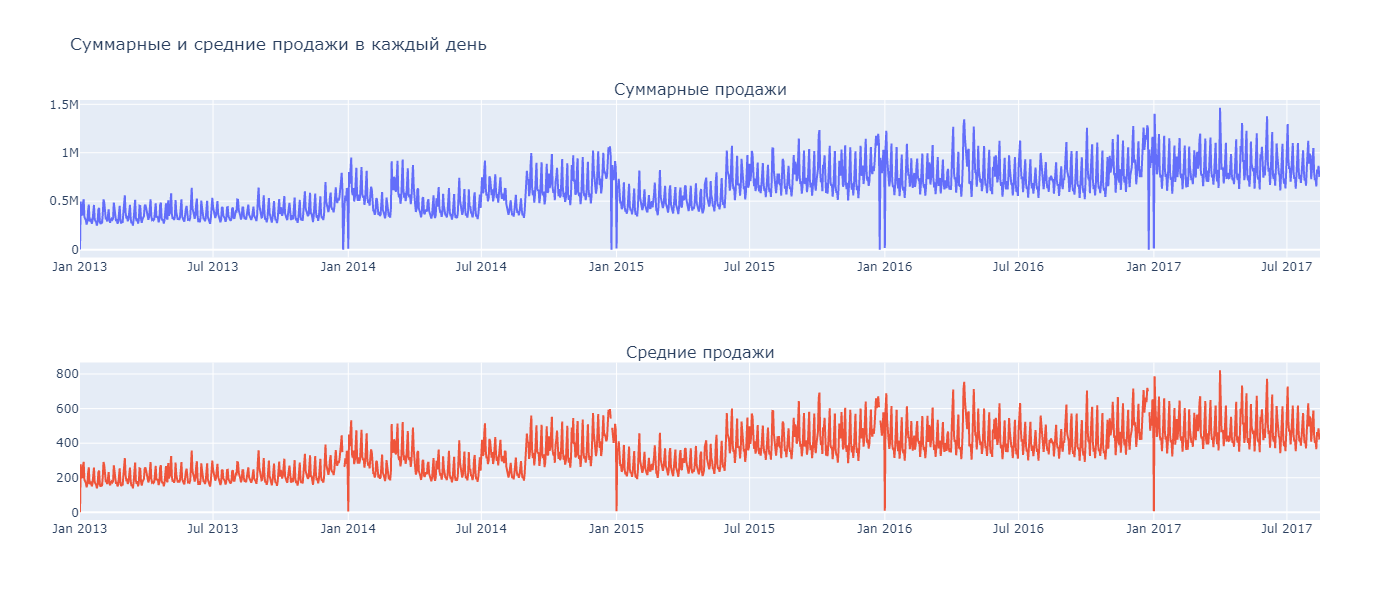

In [25]:
sales_by_day_sum = pd.DataFrame(df.set_index('date').sales.resample('D').sum()).reset_index()
sales_by_day_mean = pd.DataFrame(df.set_index('date').sales.resample('D').mean()).reset_index()

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Суммарные продажи', 'Средние продажи'))

fig.append_trace(go.Scatter(
    x=sales_by_day_sum['date'],
    y=sales_by_day_sum['sales'],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=sales_by_day_mean['date'],
    y=sales_by_day_mean['sales'],
), row=2, col=1)

fig.update_layout(height=600, width=1400, title_text='Суммарные и средние продажи в каждый день', showlegend=False)
fig.show()

display(Image(filename='img/daily_sales_sum_avg.png', width=800))

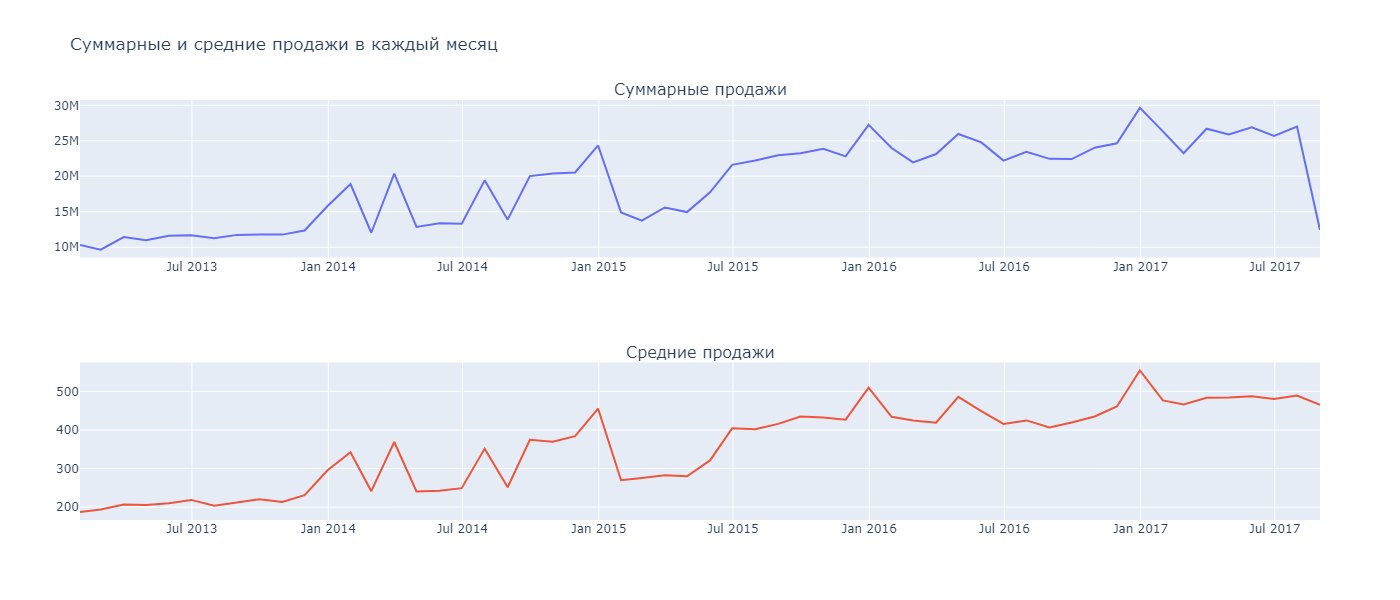

In [26]:
sales_by_month_sum = pd.DataFrame(df.set_index('date').sales.resample('M').sum()).reset_index()
sales_by_month_mean = pd.DataFrame(df.set_index('date').sales.resample('M').mean()).reset_index()

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Суммарные продажи', 'Средние продажи'))

fig.append_trace(go.Scatter(
    x=sales_by_month_sum['date'],
    y=sales_by_month_sum['sales'],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=sales_by_month_mean['date'],
    y=sales_by_month_mean['sales'],
), row=2, col=1)

fig.update_layout(height=600, width=1400, title_text='Суммарные и средние продажи в каждый месяц', showlegend=False)
fig.show()

display(Image(filename='img/monthly_sales_sum_avg.png', width=800))

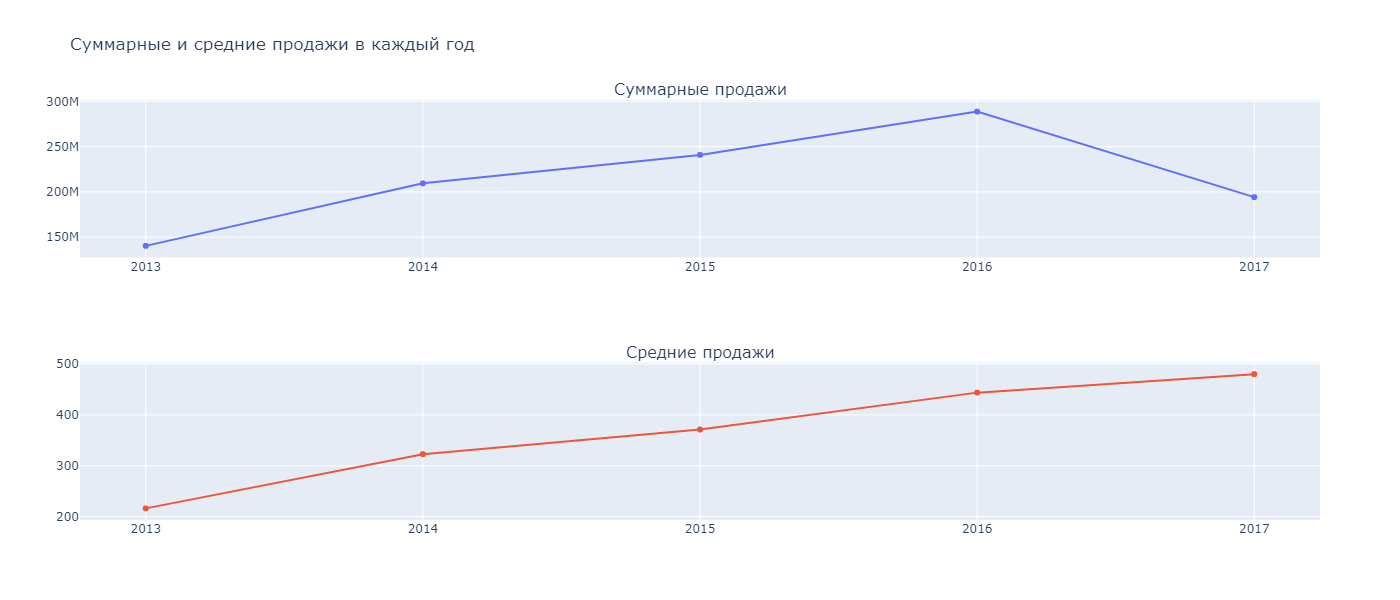

In [27]:
sales_by_year_sum = pd.DataFrame(df.set_index('date').sales.resample('Y').sum()).reset_index()
sales_by_year_mean = pd.DataFrame(df.set_index('date').sales.resample('Y').mean()).reset_index()

sales_by_year_sum['date'] = sales_by_year_sum['date'].dt.year
sales_by_year_mean['date'] = sales_by_year_mean['date'].dt.year

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Суммарные продажи', 'Средние продажи'))

fig.append_trace(go.Scatter(
    x=sales_by_year_sum['date'],
    y=sales_by_year_sum['sales'],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=sales_by_year_mean['date'],
    y=sales_by_year_mean['sales'],
), row=2, col=1)

fig.update_layout(
    xaxis1 = dict(
        tickmode = 'linear',
        tick0 = 2013,
        dtick = 1
    ),
    xaxis2 = dict(
        tickmode = 'linear',
        tick0 = 2013,
        dtick = 1
    ),
    height=600, 
    width=1400, 
    title_text='Суммарные и средние продажи в каждый год',
    showlegend=False)

fig.show()

display(Image(filename='img/yearly_sales_sum_avg.png', width=800))

Построим графики с суммарными ежемесячными продажами в каждом магазине.

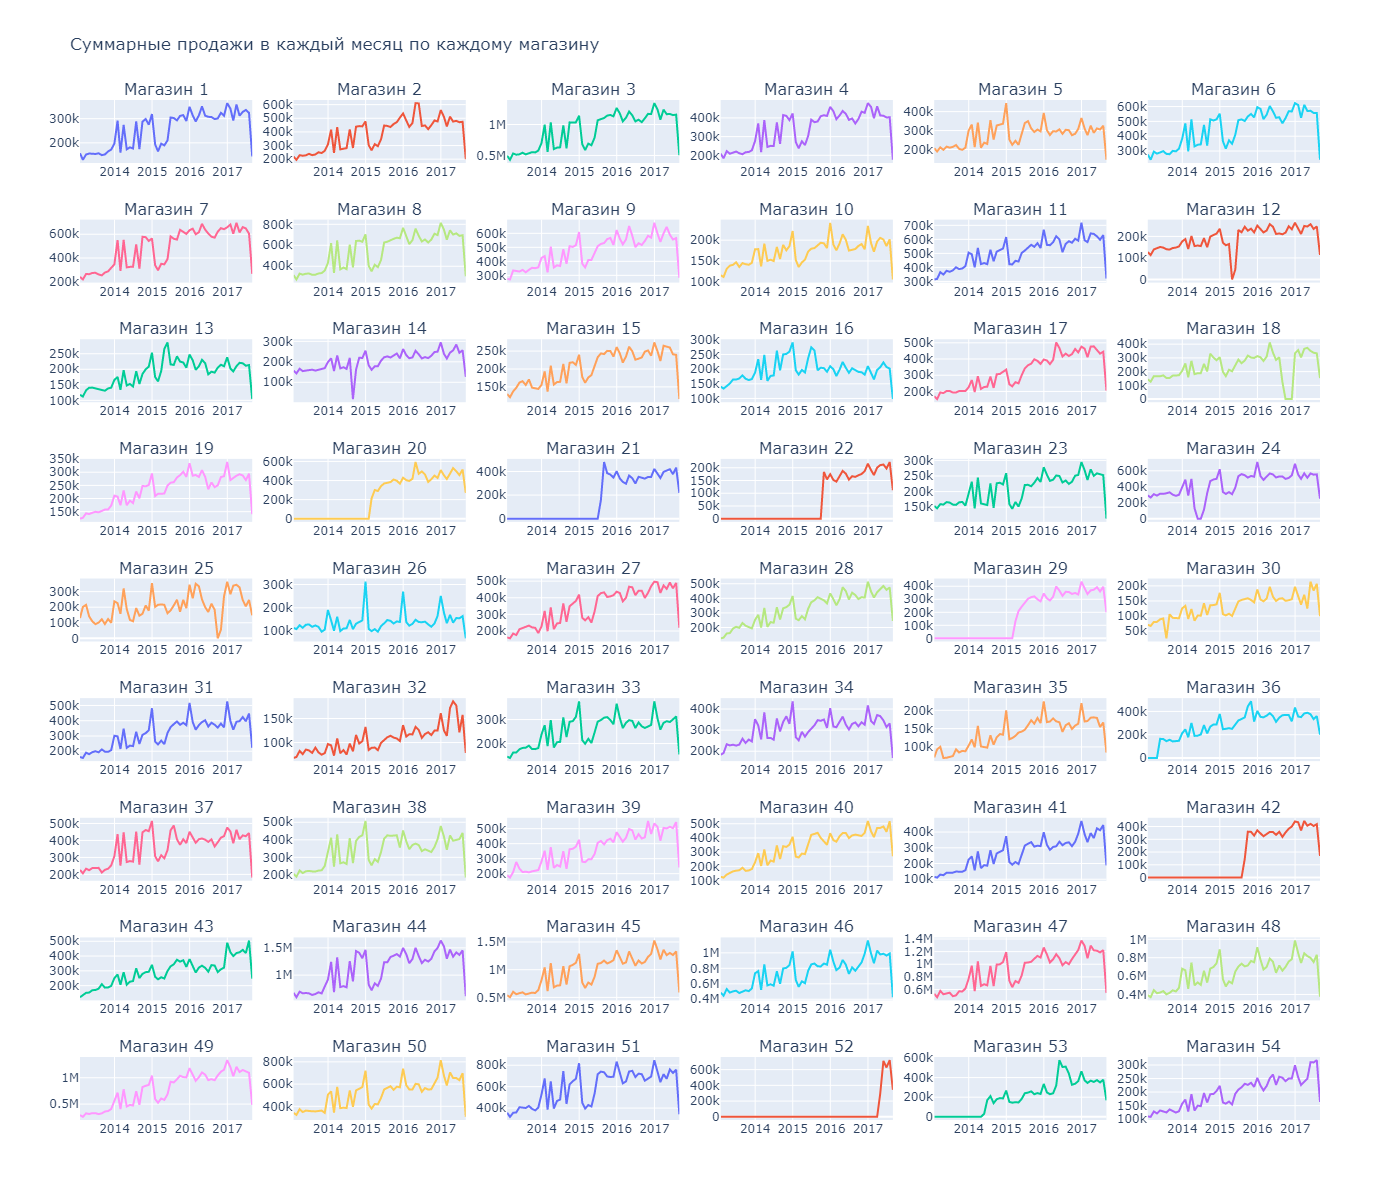

In [28]:
grouped = pd.DataFrame(df.set_index('date').groupby('store_nbr').sales.resample('M').sum())
grouped = grouped.reset_index()

ncols=6
nrows=9
store=1

subplot_titles = []
for store_nbr in range(1, 55):
    subplot_titles.append('Магазин ' + str(store_nbr))

fig = make_subplots(
    rows=nrows,
    cols=ncols,
    subplot_titles=subplot_titles)

for row in range(1, nrows+1):
    for col in range(1, ncols+1):
        if store <= 55:
            temp = grouped[grouped.store_nbr==store]
            fig.add_trace(go.Scatter(x=temp['date'], y=temp['sales']), row=row, col=col)
            store+=1
            
fig.update_layout(height=1200, width=1400, title_text='Суммарные продажи в каждый месяц по каждому магазину', showlegend=False)
fig.show()

display(Image(filename='img/monthly_sales_by_shop.png', width=800))

Построим графики со средними ежемесячными продажами в каждом магазине.

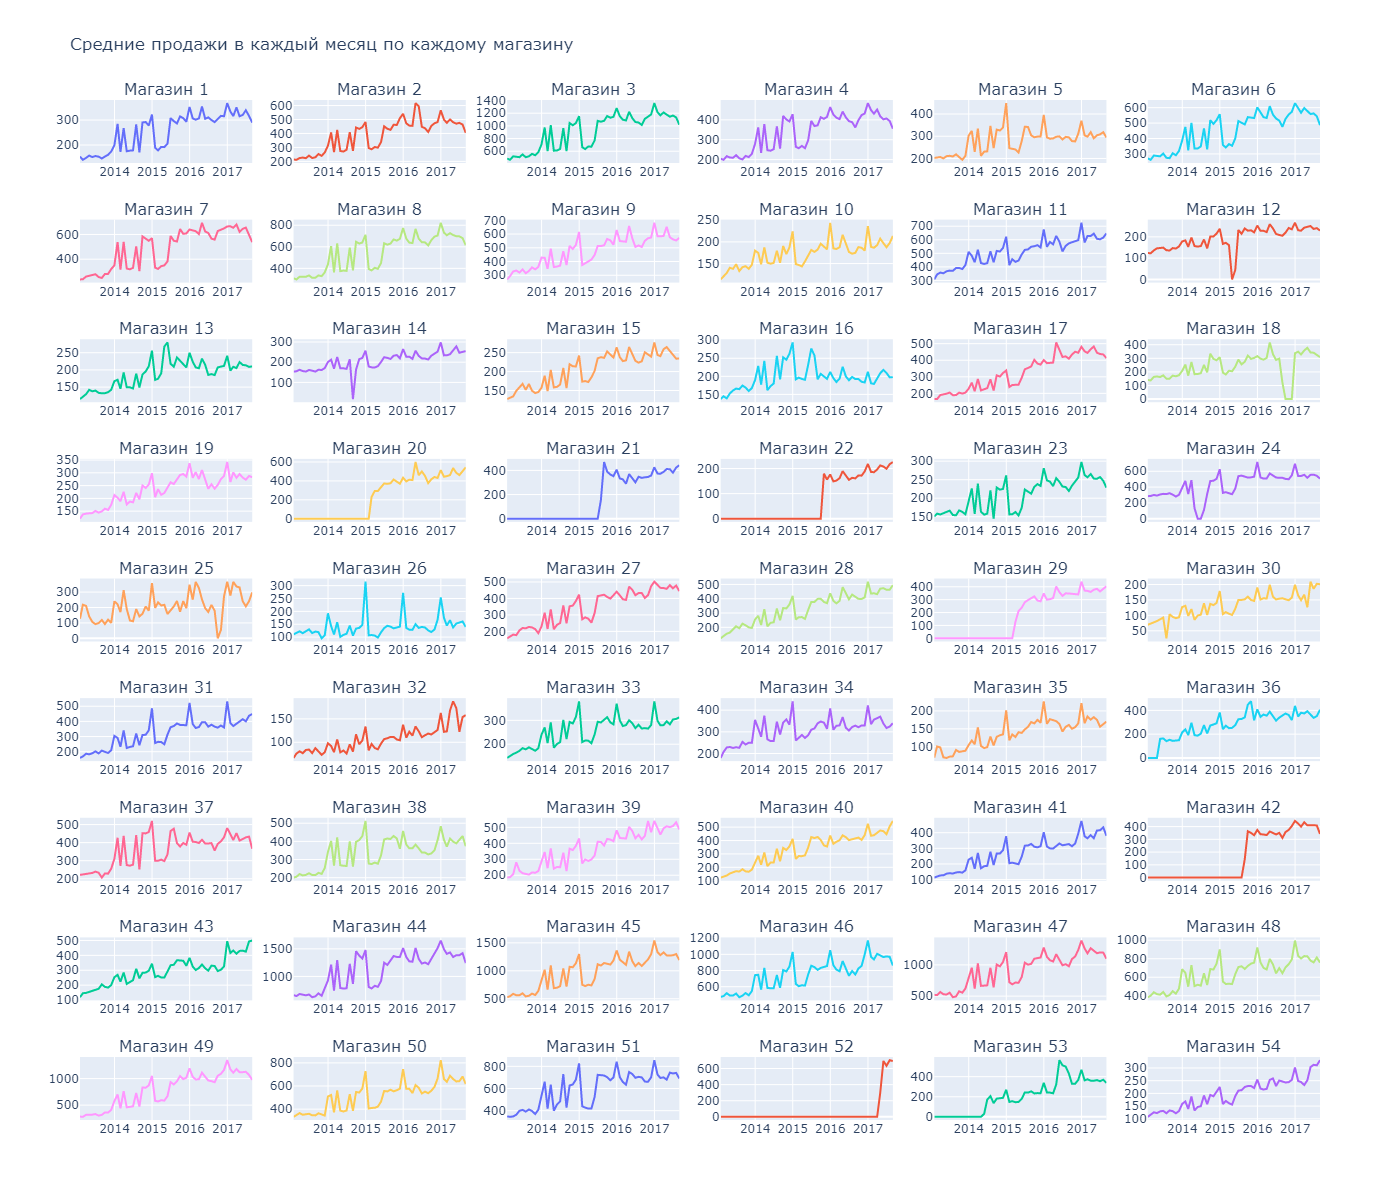

In [29]:
grouped = pd.DataFrame(df.set_index('date').groupby('store_nbr').sales.resample('M').mean())
grouped = grouped.reset_index()

ncols=6
nrows=9
store=1

subplot_titles = []
for store_nbr in range(1, 55):
    subplot_titles.append('Магазин ' + str(store_nbr))

fig = make_subplots(
    rows=nrows,
    cols=ncols,
    subplot_titles=subplot_titles)

for row in range(1, nrows+1):
    for col in range(1, ncols+1):
        if store <= 55:
            temp = grouped[grouped.store_nbr==store]
            fig.add_trace(go.Scatter(x=temp['date'], y=temp['sales']), row=row, col=col)
            store+=1

fig.update_layout(height=1200, width=1400, title_text='Средние продажи в каждый месяц по каждому магазину', showlegend=False)
fig.show()

display(Image(filename='img/monthly_sales_avg_by_shop.png', width=800))

# Наблюдения о данных

В train_df представлены данные о 54 магазинах и 33 типах продуктов.

Для каждого магазина представлено 55572 наблюдения.

Для каждого магазина представлено 1684 наблюдения по каждой категории товаров.

В train_df представлены данные с 1 января 2013 по 15 августа 2017.

В данных есть магазины с нулевыми продажами, предположительно эти магазины открылись после 1 января 2013 года.

In [30]:
# Сохранение датафрейма
# df.to_csv('data/df.csv', index=False)